# DAA Project

## Name: Vimal Kumar, Naman Jain

## NetID: nxv0154
## Student ID: 1001670153


TODO
1. Implement and compare the following sorting algorithm :
● Mergesort
● Heapsort
● Quicksort (Using median of 3)
● Insertion sort
● Bubble sort


2. YET TO COMPLETE - Implement and compare the following search algorithm:
● Linear search
● Binary search in sorted array.
● Binary search tree
● Red-Black Tree


3. Implement and compare the following shortest paths algorithm for weighted graph and unweighted graph:
● Breadth-first search (unweighted graph)
● The Bellman-Ford algorithm
● Dijkstra’s algorithm


4. Implement and compare the following Minimum Spanning Trees algorithms:
● Kruskal algorithm
● Prim algorithm

Note: Graph has been attached as graph.txt


In [0]:
# Import required modules
import random
from datetime import datetime
from copy import deepcopy
import time

In [0]:
# Assign Constants
random_generator_seed = 0
N = 10

# Sorting Algorithms

In [0]:
# Performs a bubble Sort on a given array. This includes inversion Check
# @params array - Array of list to be sorted
# @params inversionCheck - To check for inversions
def bubbleSort(array, inversionCheck = True):
  n = len(array)
  for i in range(n):
    flag = True
    max_index = 0
    for j in range(n - i - 1):
      if(array[j] > array[j+1]):
        temp = array[j]
        array[j] = array[j+1]
        array[j+1] = temp
        flag = False
    if( inversionCheck and flag ):
      break
  return array


In [0]:
# Performs insertion Sort on a given array
# @params array - Array of list to be sorted
def insertionSort(array):
  n = len(array)
  for i in range(1, n):
    key = array[i]
    j = i - 1
    while( j >= 0 and array[j] > key ):
      temp = array[j+1]
      array[j+1] = array[j]
      array[j] = temp
      j -= 1
  return array

In [0]:
def analyzeSortAlgorithm(size, type, o = True):
  array = [ random.randint(0, size) for i in range(size) ]
  if(type == "bubble"):
    sortAlgorithm = bubbleSort
  elif(type == "insertion"):
    sortAlgorithm = insertionSort
  elif(type == "quick"):
    sortAlgorithm = quickSort
  elif(type == "merge"):
    sortAlgorithm = mergeSort
  elif(type == "heap"):
    sortAlgorithm = heapSort
  else:
    print("Sorry, we have no such algorithm mentioned. Try again with a different one")
    return

  print("###################################################")
  print("Analysis for " + type + " sort algorithm for N = " + str(size))

  # Time Average Case
  if(o):
    print("Array: " + str( array ) )
  startTime = datetime.now()
  output = sortAlgorithm( array = array )
  endTime = datetime.now()
  average = endTime - startTime
  print("Average Case : " + str( average ))
  if(o):
    print("Sorted: " + str( output ) )
  
  average = average.total_seconds() * 1000
  return average

In [0]:
def quickSort(array):

  n = len(array)
  array = array

  def quickSortRecursion(low, high):
    if(low >= high):
      return
      
    mid = ( int )( ( low + high ) / 2 )

    # Finding Median
    if( ( ( array[low] <= array[mid] ) and ( array[mid] <= array[high] ) ) or ( ( array[high] <= array[mid] ) and ( array[mid] <= array[low] ) ) ):
      pass
    elif( ( ( array[mid] <= array[low] ) and ( array[low] <= array[high] ) ) or ( ( array[high] <= array[low] ) and ( array[low] <= array[mid] ) ) ):
      temp = array[low]
      array[low] = array[mid]
      array[mid] = temp
    elif( ( ( array[low] <= array[high] ) and ( array[high] <= array[mid] ) ) or ( ( array[mid] <= array[high] ) and ( array[high] <= array[low] ) ) ):
      temp = array[high]
      array[high] = array[mid]
      array[mid] = temp

    pivot = array[ mid ]
    array[ mid ] = array[ high ]

    i = low
    j = high - 1
    while( i <= j ):
      while( i < high and array[i] <= pivot ):
        i += 1
      while( j >= low and array[j] >= pivot ):
        j -= 1

      if( i < j ):
        temp = array[ i ]
        array[ i ] = array[ j ]
        array[ j ] = temp
        i += 1
        j -= 1

    array[ high ] = array[ j + 1 ]
    array[ j + 1 ] = pivot

    quickSortRecursion(low, j)
    quickSortRecursion(j + 2, high)
    return array
  
  quickSortRecursion(0, n-1)
  return array

In [0]:
def mergeSort(array):

  def mergeRecursion(array):
    n = len( array )
    if( n == 1 ):
      return array
    
    # Split into 2 halves
    mid = (int) ( n / 2 )
    leftHalf = array[ 0:mid ]
    rightHalf = array[ mid:n ]

    leftHalf  = mergeRecursion( leftHalf )
    rightHalf = mergeRecursion( rightHalf )

    n_leftHalf = len(leftHalf)
    n_rightHalf = len(rightHalf)
    i = 0
    j = 0

    output = []
    while( ( i < n_leftHalf ) and ( j < n_rightHalf ) ):
      if( leftHalf[i] > rightHalf[j] ):
        output.append( rightHalf[j] )
        j += 1
      else:
        output.append( leftHalf[i] )
        i += 1

    while( i < n_leftHalf ):
      output.append( leftHalf[i] )
      i += 1

    while( j < n_rightHalf ):
      output.append( rightHalf[j] )
      j += 1

    return output

  return mergeRecursion(array)


In [0]:
def heapSort( array ):

  def heapify( array, n, i ): 
    largest = i
    left = ( 2*i ) + 1
    right = ( 2*i ) + 2

    if left < n and array[left] > array[i]:
      largest = left

    if right < n and array[right] > array[largest]:
      largest = right

    if i != largest:
      temp = array[i]
      array[i] = array[largest]
      array[largest] = temp

      heapify( array, n, largest )

  n = len( array )

  for i in range(n, -1, -1): 
      heapify(array, n, i)
  
  for i in range(n-1, 0, -1): 

      temp = array[i]
      array[i] = array[0]
      array[0] = temp

      heapify(array, i, 0) 

  return array

In [9]:
N = range(1000, 5000, 1000)
metrics = {
    "N": [],
    "bubble": [],
    "insertion": [],
    "merge": [],
    "quick": [],
    "heap": []
}

for n in N:
  metrics['N'].append( n )

  # Performing Bubble Sort
  average = analyzeSortAlgorithm( n, type = "bubble", o = False )
  metrics['bubble'].append( average )

  # Performing Insertion Sort
  average = analyzeSortAlgorithm( n, type = "insertion", o = False )
  metrics['insertion'].append( average )

  # Performing Merge Sort
  average = analyzeSortAlgorithm( n, type = "merge", o = False )
  metrics['merge'].append( average )

  # Performing Bubble Sort
  average = analyzeSortAlgorithm( n, type = "quick", o = False )
  metrics['quick'].append( average )

  # Performing Bubble Sort
  average = analyzeSortAlgorithm( n, type = "heap", o = False )
  metrics['heap'].append( average )


###################################################
Analysis for bubble sort algorithm for N = 1000
Average Case : 0:00:00.076188
###################################################
Analysis for insertion sort algorithm for N = 1000
Average Case : 0:00:00.046852
###################################################
Analysis for merge sort algorithm for N = 1000
Average Case : 0:00:00.002691
###################################################
Analysis for quick sort algorithm for N = 1000
Average Case : 0:00:00.001822
###################################################
Analysis for heap sort algorithm for N = 1000
Average Case : 0:00:00.004845
###################################################
Analysis for bubble sort algorithm for N = 2000
Average Case : 0:00:00.305872
###################################################
Analysis for insertion sort algorithm for N = 2000
Average Case : 0:00:00.214681
###################################################
Analysis for merge sort algorithm fo

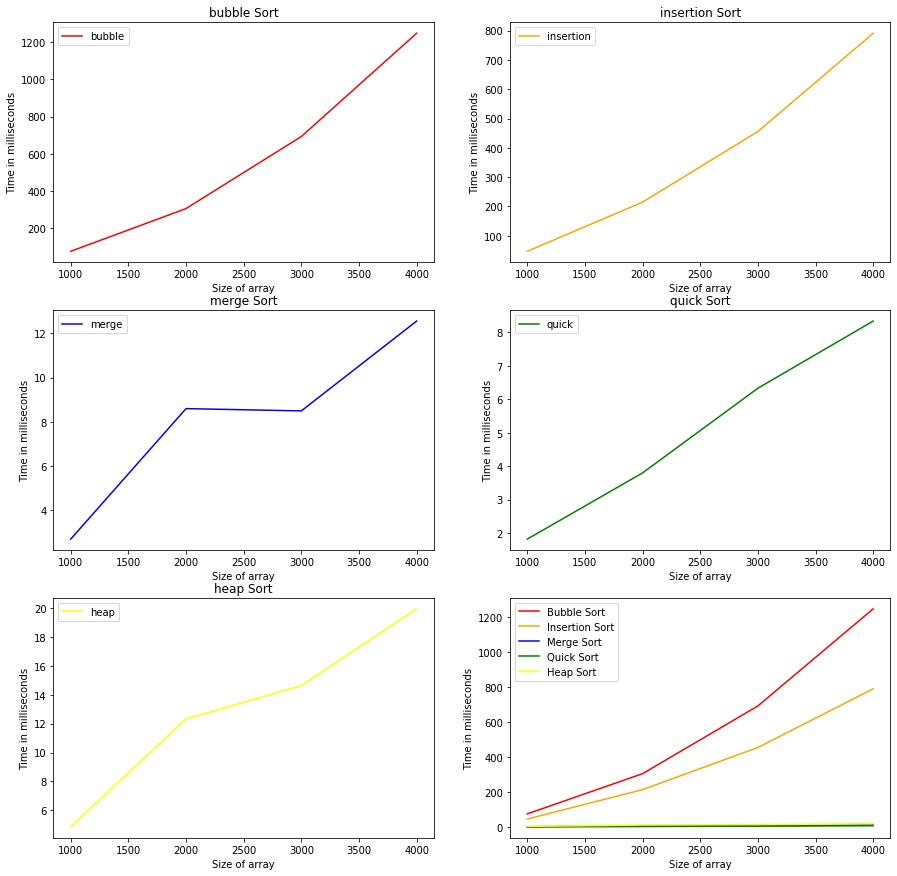

In [10]:
import matplotlib.pyplot as plt

sortTechniques = ['bubble', 'insertion', 'merge', 'quick', 'heap']
color = ['red', 'orange', 'blue', 'green', 'yellow']

plt.figure(figsize=(15,15))
for i in range(5):
  sortTechnique = sortTechniques[i]

  plt.subplot(3, 2, i + 1)

  plt.plot( metrics['N'], metrics[sortTechnique], color=color[i], label = sortTechnique  )
  plt.title(sortTechnique + ' Sort')
  plt.xlabel('Size of array')
  plt.ylabel('Time in milliseconds')

  plt.legend()

plt.subplot(3, 2, 6)
plt.plot( metrics['N'], metrics['bubble'], color=color[0], label = 'Bubble Sort'  )
plt.plot( metrics['N'], metrics['insertion'], color=color[1], label = 'Insertion Sort'  )
plt.plot( metrics['N'], metrics['merge'], color=color[2], label = 'Merge Sort'  )
plt.plot( metrics['N'], metrics['quick'], color=color[3], label = 'Quick Sort'  )
plt.plot( metrics['N'], metrics['heap'], color=color[4], label = 'Heap Sort'  )

plt.xlabel('Size of array')
plt.ylabel('Time in milliseconds')

plt.legend()
plt.show()


## Report

It is observed that bubble sort and insertion sort have a time complexity of O(n^2), while other sorts like Quick, Merge and Heap sort have a time complexity of O(n)

---

## Time Complexity Chart

> Bubble Sort

*   Best Case        : n
*   Average Case     : n^2
*   Worst Case       : n^2
*   Space Complexity : 1


> Insertion Sort

*   Best Case        : n
*   Average Case     : n^2
*   Worst Case       : n^2
*   Space Complexity : 1

> Merge Sort

*   Best Case        : n*log(n)
*   Average Case     : n*log(n)
*   Worst Case       : n*log(n)
*   Space Complexity : n

> Quick Sort

*   Best Case        : n*log(n)
*   Average Case     : n*log(n)
*   Worst Case       : n^2
*   Space Complexity : n

> Heap Sort

*   Best Case        : n*log(n)
*   Average Case     : n*log(n)
*   Worst Case       : n*log(n)
*   Space Complexity : 1

---




Sample Output from 1000 to 50000 with a step of 1000
Note: Image and output file attached as problem1_output.png and problem1_output.txt
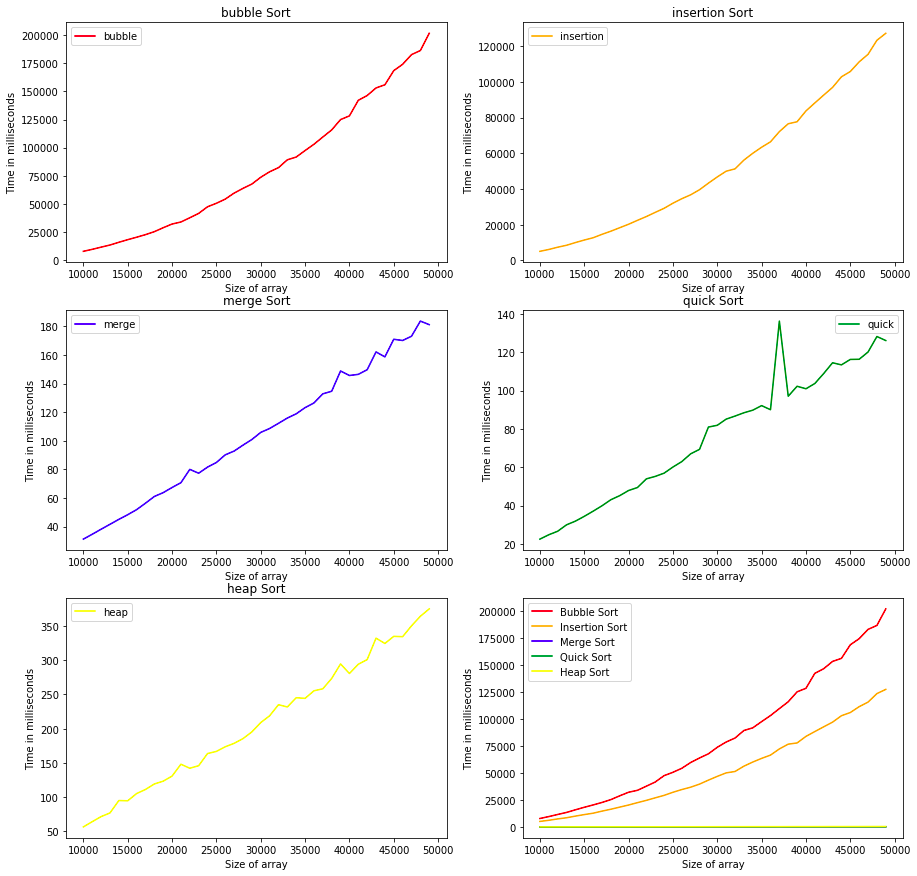

# Shortest Path Algorithms



> Graph


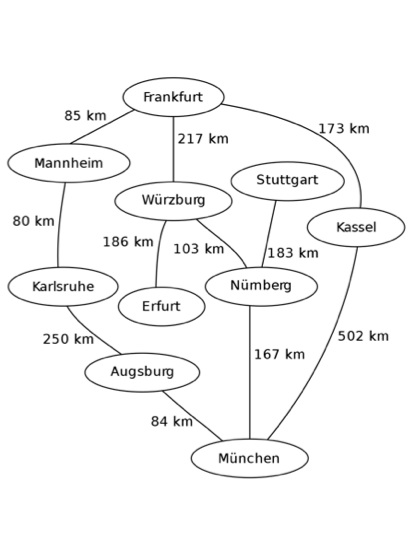

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import re
from copy import deepcopy
import random

In [17]:
# Function to read a file
def readFile( fileName ):
  with open( fileName, 'r' ) as f:
    lines = f.read().split( '\n' )
    return lines

data = readFile( 'graph.txt' )
for line in data:
  print(line)

s: Frankfurt
p: Frankfurt Mannheim 85
p: Wurzburg Frankfurt 217
p: Frankfurt Kassel 173
p: Mannheim Karlsruhe 80
p: Wurzburg Erfurt 186
p: Numberg Wurzburg 103
p: Numberg Stuttgart 183
p: Kassel Munchen 502
p: Munchen Numberg 167
p: Munchen Augsburg 84
p: Augsburg Karlsruhe 250


In [18]:
# Create a graph
mainSource = None
path = dict()
directed = False
pathCount = 0

# Add a directed path from source to destination
def addPath( source, destination, distance ):
    if not source in path:
      path[source] = dict()
    if not destination in path[source]:
      path[source][destination] = distance
    else:
      if( path[source][destination] > distance ):
        path[source][destination] = distance
    if not destination in path:
      path[destination] = dict()

# Read file and create a directed graph
for line in data:
  if( re.findall( "^s:", line ) ):
    mainSource = line.split(" ")[1]
  elif( re.findall( "^p:", line ) ):
    pathCount += 1
    words = line.split(" ")
    addPath( source = words[1], destination = words[2], distance = float( words[3] ) )
  elif( re.findall( "^directed" ), line ):
    directed = True

print( "Source: " + mainSource )
print( "Directed: " + str( directed ) )
print( "Path: " + str( path ) )
directedGraph = deepcopy(path)

Source: Frankfurt
Directed: False
Path: {'Frankfurt': {'Mannheim': 85.0, 'Kassel': 173.0}, 'Mannheim': {'Karlsruhe': 80.0}, 'Wurzburg': {'Frankfurt': 217.0, 'Erfurt': 186.0}, 'Kassel': {'Munchen': 502.0}, 'Karlsruhe': {}, 'Erfurt': {}, 'Numberg': {'Wurzburg': 103.0, 'Stuttgart': 183.0}, 'Stuttgart': {}, 'Munchen': {'Numberg': 167.0, 'Augsburg': 84.0}, 'Augsburg': {'Karlsruhe': 250.0}}


In [19]:
# Generate a undirected graph
if directed is False:
  for node in directedGraph:
    for myNeighbour in directedGraph[ node ]:
      addPath( source = myNeighbour, destination = node, distance = directedGraph[node][myNeighbour] )

unDirectedGraph = deepcopy(path)
if mainSource is None:
  keys = list( directedGraph.keys() )
  mainSource = keys[ random.randint( 0, len(keys) ) ]

print( "Source: " + mainSource )
print( "Undirected Path: \n" + str(unDirectedGraph) )

# Convert a given graph to unit weights (unweighted)
def convertToUnitDistance( graph ):
  for source in graph:
    for destination in graph[source]:
      graph[source][destination] = 1
  return graph

# Result is the shorted route from a given source
# @params result - dict( location { distance, path } )
def printRoute( result ):
  print("Destination \t Distance \t Path")
  for destination in result:
    print( destination + " \t " + str(result[destination]["distance"]) + " \t " + str(result[destination]["path"]) )

Source: Frankfurt
Undirected Path: 
{'Frankfurt': {'Mannheim': 85.0, 'Kassel': 173.0, 'Wurzburg': 217.0}, 'Mannheim': {'Karlsruhe': 80.0, 'Frankfurt': 85.0}, 'Wurzburg': {'Frankfurt': 217.0, 'Erfurt': 186.0, 'Numberg': 103.0}, 'Kassel': {'Munchen': 502.0, 'Frankfurt': 173.0}, 'Karlsruhe': {'Mannheim': 80.0, 'Augsburg': 250.0}, 'Erfurt': {'Wurzburg': 186.0}, 'Numberg': {'Wurzburg': 103.0, 'Stuttgart': 183.0, 'Munchen': 167.0}, 'Stuttgart': {'Numberg': 183.0}, 'Munchen': {'Numberg': 167.0, 'Augsburg': 84.0, 'Kassel': 502.0}, 'Augsburg': {'Karlsruhe': 250.0, 'Munchen': 84.0}}


In [0]:
# Perform BFS on a given directed or undirected graph
def BFS( graph, source ):
  output = dict()
  for key in graph:
    output[key] = dict()
    output[key]["distance"] = float("inf")
    output[key]["path"] = [  ]

  output[source]["distance"] = 0.0

  print( "Source: " + source )

  visited = [ ]
  queue = [ ]
  queue.append( source )
  visited.append( source )

  while( len(queue) != 0 ):
    start = queue[0]
    del queue[0]
    for myNeighbour in graph[ start ]:
      if not myNeighbour in visited:
        output[myNeighbour]["distance"] = output[start]["distance"] + graph[start][myNeighbour]
        output[myNeighbour]["path"] = output[start]["path"] + [ start ]
        visited.append( myNeighbour )
        queue.append( myNeighbour )

  return output



In [21]:
# BFS for undirected weighted Graph
graph = deepcopy(unDirectedGraph)
result = BFS(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 85.0 	 ['Frankfurt']
Wurzburg 	 217.0 	 ['Frankfurt']
Kassel 	 173.0 	 ['Frankfurt']
Karlsruhe 	 165.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 403.0 	 ['Frankfurt', 'Wurzburg']
Numberg 	 320.0 	 ['Frankfurt', 'Wurzburg']
Stuttgart 	 503.0 	 ['Frankfurt', 'Wurzburg', 'Numberg']
Munchen 	 675.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 415.0 	 ['Frankfurt', 'Mannheim', 'Karlsruhe']


In [22]:
# BFS for directed weighted Graph
graph = deepcopy(directedGraph)
result = BFS(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 85.0 	 ['Frankfurt']
Wurzburg 	 945.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Kassel 	 173.0 	 ['Frankfurt']
Karlsruhe 	 165.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 1131.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg', 'Wurzburg']
Numberg 	 842.0 	 ['Frankfurt', 'Kassel', 'Munchen']
Stuttgart 	 1025.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Munchen 	 675.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 759.0 	 ['Frankfurt', 'Kassel', 'Munchen']


In [23]:
# BFS for undirected unweighted Graph
graph = deepcopy(unDirectedGraph) 
graph = convertToUnitDistance(graph) 
result = BFS(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 1.0 	 ['Frankfurt']
Wurzburg 	 1.0 	 ['Frankfurt']
Kassel 	 1.0 	 ['Frankfurt']
Karlsruhe 	 2.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 2.0 	 ['Frankfurt', 'Wurzburg']
Numberg 	 2.0 	 ['Frankfurt', 'Wurzburg']
Stuttgart 	 3.0 	 ['Frankfurt', 'Wurzburg', 'Numberg']
Munchen 	 2.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 3.0 	 ['Frankfurt', 'Mannheim', 'Karlsruhe']


In [24]:
# BFS for directed unweighted Graph
graph = deepcopy(directedGraph) 
graph = convertToUnitDistance(graph) 
result = BFS(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 1.0 	 ['Frankfurt']
Wurzburg 	 4.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Kassel 	 1.0 	 ['Frankfurt']
Karlsruhe 	 2.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 5.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg', 'Wurzburg']
Numberg 	 3.0 	 ['Frankfurt', 'Kassel', 'Munchen']
Stuttgart 	 4.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Munchen 	 2.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 3.0 	 ['Frankfurt', 'Kassel', 'Munchen']


In [0]:
# Perform BellmanFord on a given directed or undirected graph
# @params graph - Directed or Undirected Graph
# @params source - Start Node
def BellmanFord( graph, source ):
  output = dict()
  for key in graph:
    output[key] = dict()
    output[key]["distance"] = float("inf")
    output[key]["path"] = [  ]

  output[source]["distance"] = 0.0

  print( "Source: " + source )
  # print( "Graph : " + str(graph) )

  keys = list( output.keys() )

  visited = []
  for i in range( len(keys) ):
    for source in keys:
      for myNeighbour in graph[source]:
        if myNeighbour in graph[source]:
          source_neighbour_distance = output[source]["distance"] + graph[source][myNeighbour]
          if output[myNeighbour]["distance"] > source_neighbour_distance:
            output[myNeighbour]["distance"] = source_neighbour_distance
            output[myNeighbour]["path"] = output[source]["path"] + [ source ]
        
  return output;

In [26]:
# Bellman Ford for undirected weighted Graph
graph = deepcopy(unDirectedGraph)
result = BellmanFord(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 85.0 	 ['Frankfurt']
Wurzburg 	 217.0 	 ['Frankfurt']
Kassel 	 173.0 	 ['Frankfurt']
Karlsruhe 	 165.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 403.0 	 ['Frankfurt', 'Wurzburg']
Numberg 	 320.0 	 ['Frankfurt', 'Wurzburg']
Stuttgart 	 503.0 	 ['Frankfurt', 'Wurzburg', 'Numberg']
Munchen 	 487.0 	 ['Frankfurt', 'Wurzburg', 'Numberg']
Augsburg 	 415.0 	 ['Frankfurt', 'Mannheim', 'Karlsruhe']


In [27]:
# Bellman Ford for directed weighted Graph
graph = deepcopy(directedGraph)
result = BellmanFord(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 85.0 	 ['Frankfurt']
Wurzburg 	 945.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Kassel 	 173.0 	 ['Frankfurt']
Karlsruhe 	 165.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 1131.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg', 'Wurzburg']
Numberg 	 842.0 	 ['Frankfurt', 'Kassel', 'Munchen']
Stuttgart 	 1025.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Munchen 	 675.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 759.0 	 ['Frankfurt', 'Kassel', 'Munchen']


In [28]:
# Bellman Ford for undirected unweighted Graph
graph = deepcopy(unDirectedGraph) 
graph = convertToUnitDistance(graph) 
result = BellmanFord(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 1.0 	 ['Frankfurt']
Wurzburg 	 1.0 	 ['Frankfurt']
Kassel 	 1.0 	 ['Frankfurt']
Karlsruhe 	 2.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 2.0 	 ['Frankfurt', 'Wurzburg']
Numberg 	 2.0 	 ['Frankfurt', 'Wurzburg']
Stuttgart 	 3.0 	 ['Frankfurt', 'Wurzburg', 'Numberg']
Munchen 	 2.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 3.0 	 ['Frankfurt', 'Mannheim', 'Karlsruhe']


In [29]:
# Bellman Ford for directed unweighted Graph
graph = deepcopy(directedGraph) 
graph = convertToUnitDistance(graph) 
result = BellmanFord(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 1.0 	 ['Frankfurt']
Wurzburg 	 4.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Kassel 	 1.0 	 ['Frankfurt']
Karlsruhe 	 2.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 5.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg', 'Wurzburg']
Numberg 	 3.0 	 ['Frankfurt', 'Kassel', 'Munchen']
Stuttgart 	 4.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Munchen 	 2.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 3.0 	 ['Frankfurt', 'Kassel', 'Munchen']


In [0]:
# Getting a node with minimum distance on it
# @params fringe - dict( location { distance, path } )
# @params visited - An array to keep track of visited nodes
def getMinNode( fringe, visited ):
  minDistance = float( "inf" )
  minKey = None
  for key in fringe:
    if not key in visited:
      if fringe[key]["distance"] < minDistance:
        minDistance = fringe[key]["distance"]
        minKey = key
  return minKey 

# Perform Dijkstra on a given directed or undirected graph
# @params graph - Directed or Undirected Graph
# @params source - Start Node
def dijkstra( graph, source ):
  output = dict()
  for key in graph:
    output[key] = dict()
    output[key]["distance"] = float("inf")
    output[key]["path"] = [  ]

  output[source]["distance"] = 0.0

  print( "Source: " + source )
  # print( "Graph : " + str(graph) )

  keys = list( output.keys() )

  visited = []
  for i in range( len(keys) ):
    start = getMinNode( output, visited )
    visited.append( start )
    for myNeighbour in graph[start]:
      if ( not myNeighbour in visited ) and ( myNeighbour in graph[start] ) :
        z = graph[start][myNeighbour] + output[ start ]["distance"];
        if output[myNeighbour]["distance"] > z:
          output[myNeighbour] = {
              "distance": z,
              "path": output[ start ]["path"] + [start]
          }
  return output;


In [31]:
# Dijkstra for undirected weighted Graph
graph = deepcopy(unDirectedGraph)
result = dijkstra(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 85.0 	 ['Frankfurt']
Wurzburg 	 217.0 	 ['Frankfurt']
Kassel 	 173.0 	 ['Frankfurt']
Karlsruhe 	 165.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 403.0 	 ['Frankfurt', 'Wurzburg']
Numberg 	 320.0 	 ['Frankfurt', 'Wurzburg']
Stuttgart 	 503.0 	 ['Frankfurt', 'Wurzburg', 'Numberg']
Munchen 	 487.0 	 ['Frankfurt', 'Wurzburg', 'Numberg']
Augsburg 	 415.0 	 ['Frankfurt', 'Mannheim', 'Karlsruhe']


In [32]:
# Dijkstra for directed weighted Graph
graph = deepcopy(directedGraph)
result = dijkstra(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 85.0 	 ['Frankfurt']
Wurzburg 	 945.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Kassel 	 173.0 	 ['Frankfurt']
Karlsruhe 	 165.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 1131.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg', 'Wurzburg']
Numberg 	 842.0 	 ['Frankfurt', 'Kassel', 'Munchen']
Stuttgart 	 1025.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Munchen 	 675.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 759.0 	 ['Frankfurt', 'Kassel', 'Munchen']


In [33]:
# Dijkstra for for undirected unweighted Graph
graph = deepcopy(unDirectedGraph) 
graph = convertToUnitDistance(graph) 
result = dijkstra(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 1.0 	 ['Frankfurt']
Wurzburg 	 1.0 	 ['Frankfurt']
Kassel 	 1.0 	 ['Frankfurt']
Karlsruhe 	 2.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 2.0 	 ['Frankfurt', 'Wurzburg']
Numberg 	 2.0 	 ['Frankfurt', 'Wurzburg']
Stuttgart 	 3.0 	 ['Frankfurt', 'Wurzburg', 'Numberg']
Munchen 	 2.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 3.0 	 ['Frankfurt', 'Mannheim', 'Karlsruhe']


In [34]:
# Dijkstra for for directed unweighted Graph
graph = deepcopy(directedGraph) 
graph = convertToUnitDistance(graph) 
result = dijkstra(graph, mainSource)
printRoute(result)

Source: Frankfurt
Destination 	 Distance 	 Path
Frankfurt 	 0.0 	 []
Mannheim 	 1.0 	 ['Frankfurt']
Wurzburg 	 4.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Kassel 	 1.0 	 ['Frankfurt']
Karlsruhe 	 2.0 	 ['Frankfurt', 'Mannheim']
Erfurt 	 5.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg', 'Wurzburg']
Numberg 	 3.0 	 ['Frankfurt', 'Kassel', 'Munchen']
Stuttgart 	 4.0 	 ['Frankfurt', 'Kassel', 'Munchen', 'Numberg']
Munchen 	 2.0 	 ['Frankfurt', 'Kassel']
Augsburg 	 3.0 	 ['Frankfurt', 'Kassel', 'Munchen']


## Report

We can see that Bellman Ford and Dijkstra given the same output. While, the BFS gives just another route. We can see this as Muchen in undirected weighted graph generates a longer route in BFS when compared to other algorithms

Note: The above program has been developed as Adjaceny List

Thus showing Dijkstra algorithm is comparitively better

---

## Time Complexity Chart

> BFS

*   Time Complexity - Adjaceny Matrix  : V^2
*   Time Complexity - Adjaceny List    : V + E

> Bellman Ford Algorithm

*   Time Complexity - Adjaceny Matrix  : V^2
*   Time Complexity - Adjaceny List    : V * E

> Dijkstra Algorithm

*   Time Complexity - Adjaceny Matrix  : V^2
*   Time Complexity - Adjaceny List    : E * log(V)



# Minimum Spanning Tree Algorithms

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import re
from copy import deepcopy
import random

In [37]:
# Function to read a file
def readFile( fileName ):
  with open( fileName, 'r' ) as f:
    lines = f.read().split( '\n' )
    return lines

data = readFile( 'graph.txt' )
for line in data:
  print(line)

s: Frankfurt
p: Frankfurt Mannheim 85
p: Wurzburg Frankfurt 217
p: Frankfurt Kassel 173
p: Mannheim Karlsruhe 80
p: Wurzburg Erfurt 186
p: Numberg Wurzburg 103
p: Numberg Stuttgart 183
p: Kassel Munchen 502
p: Munchen Numberg 167
p: Munchen Augsburg 84
p: Augsburg Karlsruhe 250


In [38]:
# Create a graph

mainSource = None
path = dict()
directed = False
pathCount = 0

# Add a directed path from source to destination
def addPath( source, destination, distance ):
    if not source in path:
      path[source] = dict()
    if not destination in path[source]:
      path[source][destination] = distance
    else:
      if( path[source][destination] > distance ):
        path[source][destination] = distance
    if not destination in path:
      path[destination] = dict()


# Read file and create a directed graph
for line in data:
  if( re.findall( "^s:", line ) ):
    mainSource = line.split(" ")[1]
  elif( re.findall( "^p:", line ) ):
    pathCount += 1
    words = line.split(" ")
    addPath( source = words[1], destination = words[2], distance = float( words[3] ) )
  elif( re.findall( "^directed" ), line ):
    directed = True

print( "Source: " + mainSource )
print( "Directed: " + str( directed ) )
print( "Path: " + str( path ) )
directedGraph = deepcopy(path)

Source: Frankfurt
Directed: False
Path: {'Frankfurt': {'Mannheim': 85.0, 'Kassel': 173.0}, 'Mannheim': {'Karlsruhe': 80.0}, 'Wurzburg': {'Frankfurt': 217.0, 'Erfurt': 186.0}, 'Kassel': {'Munchen': 502.0}, 'Karlsruhe': {}, 'Erfurt': {}, 'Numberg': {'Wurzburg': 103.0, 'Stuttgart': 183.0}, 'Stuttgart': {}, 'Munchen': {'Numberg': 167.0, 'Augsburg': 84.0}, 'Augsburg': {'Karlsruhe': 250.0}}


In [39]:
if directed is False:
  for node in directedGraph:
    for myNeighbour in directedGraph[ node ]:
      addPath( source = myNeighbour, destination = node, distance = directedGraph[node][myNeighbour] )

unDirectedGraph = deepcopy(path)
if mainSource is None:
  keys = list( directedGraph.keys() )
  mainSource = keys[ random.randint( 0, len(keys) ) ]

print( "Source: " + mainSource )
print( "Undirected Path: \n" + str(unDirectedGraph) )

def printMST( mst ):
  print( "Minimum Spanning Tree: " )
  for node in mst:
    if not mst[node]["parent"] is None:
      print(mst[node]["parent"] + " -- " + node + " : " + str( mst[node]["distance"] ) )

Source: Frankfurt
Undirected Path: 
{'Frankfurt': {'Mannheim': 85.0, 'Kassel': 173.0, 'Wurzburg': 217.0}, 'Mannheim': {'Karlsruhe': 80.0, 'Frankfurt': 85.0}, 'Wurzburg': {'Frankfurt': 217.0, 'Erfurt': 186.0, 'Numberg': 103.0}, 'Kassel': {'Munchen': 502.0, 'Frankfurt': 173.0}, 'Karlsruhe': {'Mannheim': 80.0, 'Augsburg': 250.0}, 'Erfurt': {'Wurzburg': 186.0}, 'Numberg': {'Wurzburg': 103.0, 'Stuttgart': 183.0, 'Munchen': 167.0}, 'Stuttgart': {'Numberg': 183.0}, 'Munchen': {'Numberg': 167.0, 'Augsburg': 84.0, 'Kassel': 502.0}, 'Augsburg': {'Karlsruhe': 250.0, 'Munchen': 84.0}}


In [40]:
# Prims algorithm on a undirected Graph
# To check if a given graph is Minimum Spanning Tree or not

def getMinNode( mst, visited ):
  minDistance = float( "inf" )
  minKey = None
  for key in mst:
    if not key in visited:
      if mst[key]["distance"] < minDistance:
        minDistance = mst[key]["distance"]
        minKey = key
  return minKey 

def prim( graph, source ):
  mst = dict()
  for key in graph:
    mst[key] = dict()
    mst[key]["distance"] = float("inf")
    mst[key]["parent"] = None

  mst[source]["distance"] = 0.0
  print( "Source: " + source )
  print( "Graph : " + str(graph) )

  keys = list( mst.keys() )

  visited = []
  for i in range( len(keys) ):
    start = getMinNode( mst, visited )
    visited.append( start )
    for myNeighbour in graph[start]:
      if ( not myNeighbour in visited ) and ( myNeighbour in graph[start] ) :
        if mst[myNeighbour]["distance"] > graph[start][myNeighbour]:
          mst[myNeighbour] = {
              "distance": graph[start][myNeighbour],
              "parent": start
          }

  return mst

print("PRIMS OUTPUT")
graph = deepcopy(unDirectedGraph)
mst = prim(graph, mainSource)
printMST(mst)

PRIMS OUTPUT
Source: Frankfurt
Graph : {'Frankfurt': {'Mannheim': 85.0, 'Kassel': 173.0, 'Wurzburg': 217.0}, 'Mannheim': {'Karlsruhe': 80.0, 'Frankfurt': 85.0}, 'Wurzburg': {'Frankfurt': 217.0, 'Erfurt': 186.0, 'Numberg': 103.0}, 'Kassel': {'Munchen': 502.0, 'Frankfurt': 173.0}, 'Karlsruhe': {'Mannheim': 80.0, 'Augsburg': 250.0}, 'Erfurt': {'Wurzburg': 186.0}, 'Numberg': {'Wurzburg': 103.0, 'Stuttgart': 183.0, 'Munchen': 167.0}, 'Stuttgart': {'Numberg': 183.0}, 'Munchen': {'Numberg': 167.0, 'Augsburg': 84.0, 'Kassel': 502.0}, 'Augsburg': {'Karlsruhe': 250.0, 'Munchen': 84.0}}
Minimum Spanning Tree: 
Frankfurt -- Mannheim : 85.0
Frankfurt -- Wurzburg : 217.0
Frankfurt -- Kassel : 173.0
Mannheim -- Karlsruhe : 80.0
Wurzburg -- Erfurt : 186.0
Wurzburg -- Numberg : 103.0
Numberg -- Stuttgart : 183.0
Numberg -- Munchen : 167.0
Munchen -- Augsburg : 84.0


In [41]:
# Kruskal Algorithm

def getMinEdge( graph ):
  minWeight = float("inf")
  minSource = None
  minDestination = None
  for source in graph:
    for destination in graph[source]:
      if minWeight > graph[source][destination]:
        minWeight = graph[source][destination]
        minSource = source
        minDestination = destination
  
  return minSource, minDestination, minWeight

def getMySet( sets, node ):

  for i in range( len(sets) ):
    if node in sets[i]:
      return i
  return -1

def joinSets( sets, index_A, index_B ):
  A = sets[index_A]
  B = sets[index_B]
  jointSet = A + B
  sets.append(jointSet)
  sets.remove(A)
  sets.remove(B)

def kruskal( graph ):
  sets = [ ]
  mst = dict( )
  for i in range(pathCount):
    source, destination, distance = getMinEdge( graph )
    graph[source][destination] = float( "inf" )
    graph[destination][source] = float( "inf" )
    sourceSet = getMySet( sets, source )
    destinationSet = getMySet( sets, destination )
    if sourceSet == destinationSet and sourceSet != -1:
      continue

    if sourceSet == -1 and destinationSet == -1:
      sets.append( [ source, destination ] )
    elif sourceSet == -1:
      sets[ destinationSet ].append( source )
    elif destinationSet == -1:
      sets[ sourceSet ].append( destination )
    else:
      joinSets( sets, sourceSet, destinationSet )
    mst[destination] = {
        "distance": distance,
        "parent": source
    }
  return mst

print("KRUSKAL OUTPUT")
graph = deepcopy(unDirectedGraph)
mst = kruskal(graph)
printMST(mst)

KRUSKAL OUTPUT
Minimum Spanning Tree: 
Mannheim -- Karlsruhe : 80.0
Munchen -- Augsburg : 84.0
Frankfurt -- Mannheim : 85.0
Wurzburg -- Numberg : 103.0
Numberg -- Munchen : 167.0
Frankfurt -- Kassel : 173.0
Numberg -- Stuttgart : 183.0
Wurzburg -- Erfurt : 186.0
Frankfurt -- Wurzburg : 217.0


## Report

This is the MST generated for both the algorithms (Prim and Kruskal)

> Generated MST:

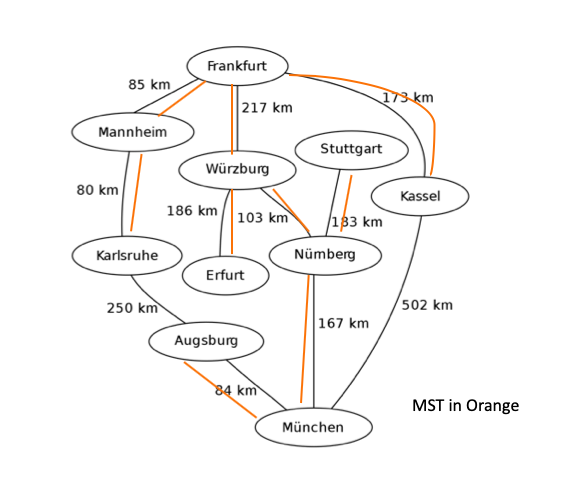


Note: The following has been done with adjacent matrix
---

## Time Complexity Chart

> Prims

*   Time Complexity - Adjaceny Matrix : V^2
*   Time Complexity - Adjaceny List   : V + E
*   Time Complexity - Binary Heap     : V * E * log(V)
*   Time Complexity - Fibonacci Heap  : V + (E * log(V))

> Kruskal

*   Time Complexity - Adjaceny Matrix : V^2
*   Time Complexity - Adjaceny List   : E * log(V)
